# Exploratory Data Analysis
<hr>

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True, font_scale=1.2)

In [3]:
from IPython.display import display

In [4]:
import warnings
warnings.simplefilter(action='ignore')

In [5]:
pd.set_option('display.max_rows', 200)

<h3  style="color:Blue;"> Data Understanding and little Wrangling</h3>

In [6]:
train = pd.read_csv("train.csv", index_col = False)
test = pd.read_csv("test.csv", index_col = False)

In [7]:
train.head(6).T

,0,1,2,3,4,5
runDate,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01
stations,FZR,FDK,KKP,GJUT,GNA,BTI
trainCode,12138,12138,12138,12138,12138,12138
trainStationId,2657812,2659393,2658108,2734206,2742572,2657716
scheduledArrival,NaN,2020-01-01 22:05:00,2020-01-01 22:23:00,2020-01-01 22:38:00,2020-01-01 22:54:00,2020-01-01 23:25:00
scheduledDeparture,2020-01-01 21:40:00,2020-01-01 22:07:00,2020-01-01 22:25:00,2020-01-01 22:40:00,2020-01-01 22:56:00,2020-01-01 23:50:00
actualArrival,2020-01-01 00:00:00,2020-01-01 22:16:00,2020-01-01 22:37:00,2020-01-01 22:56:00,2020-01-01 23:14:00,2020-01-01 23:31:00
actualDeparture,2020-01-01 21:40:00,2020-01-01 22:18:00,2020-01-01 22:38:00,2020-01-01 22:57:00,2020-01-01 23:15:00,2020-01-01 23:51:00
distance,0,32,45,61,76,88
dayCount,0,0,0,0,0,0


In [8]:
print("Total number of observation present: {}".format(train.shape[0]))

Total number of observation present: 31875


#### Checking for missing values and datatype 

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31875 entries, 0 to 31874
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   runDate             31875 non-null  object
 1   stations            31875 non-null  object
 2   trainCode           31875 non-null  int64 
 3   trainStationId      31875 non-null  int64 
 4   scheduledArrival    31184 non-null  object
 5   scheduledDeparture  31097 non-null  object
 6   actualArrival       31875 non-null  object
 7   actualDeparture     31775 non-null  object
 8   distance            31875 non-null  int64 
 9   dayCount            31875 non-null  int64 
 10  ArrivalDelay        31875 non-null  int64 
 11  DepartureDelay      31875 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.9+ MB


In [10]:
null_analysis = train.isnull().sum().reset_index()
null_analysis[1] = (null_analysis[0]*100)/train.shape[0]
null_analysis.columns = ['Columns', 'Null Count', '%Null Count']
null_analysis

,Columns,Null Count,%Null Count
0,runDate,0,0.000000
1,stations,0,0.000000
2,trainCode,0,0.000000
3,trainStationId,0,0.000000
4,scheduledArrival,691,2.167843
5,scheduledDeparture,778,2.440784
6,actualArrival,0,0.000000
7,actualDeparture,100,0.313725
8,distance,0,0.000000
9,dayCount,0,0.000000


#### Checking for any abnormality in stations and trainStationId
Is they follow 1:1 mapping?

In [11]:
station_vs_id = train.groupby(['stations'])['trainStationId'].nunique().reset_index()
display(station_vs_id.head(5))
# Check the unique count is greater than 1
print("\nStations having more than 1 ID:",station_vs_id[station_vs_id['trainStationId']>1].shape[0])

,stations,trainStationId
0,ADH,1
1,ADI,1
2,AGC,1
3,AGN,1
4,AJJ,1



Stations having more than 1 ID: 0


#### Checking for any duplicate observations 

In [12]:
print("Total observation", train.shape[0])
print("Total unique observations:", train.drop_duplicates().shape[0])

Total observation 31875
Total unique observations: 31875


<h3  style="color:MediumSeaGreen;">Observations:</h3><hr> 

- The dtype for 'runDate', 'scheduledArrival', 'scheduledDeparture', 'actualArrival', 'actualDeparture' columns is object which means pandas currently views these values as strings we have to convert it to <b>datetime</b>.


- <b>scheduledArrival, scheduledDeparture, actualDeparture  contains missing values.</b>


- Yes there is 1:1 mapping between stations and trainStationId no abnormality is present we can drop one of them.


- There is no duplicity in the DataSet.


- There is no abnoramlity in columns.


- <b>Columns to work upon are</b>

    - dayCount
    - distance
    - runDate
    - scheduledArrival
    - scheduledDeparture
    - stations
    - trainCode
    
    
- <b>Columns to predict</b>


    - ArrivalDelay
    - ArrivalDelay

(As actualArrival, actualDeparture can be derived from them and also there are missing values in actualDeparture)

<hr>

<h3  style="color:Blue;"> Data Preprocessing</h3>

In [13]:
cols_to_work =['runDate', 'stations', 'trainCode', 'scheduledArrival',
               'scheduledDeparture', 'distance', 'dayCount', 'ArrivalDelay', 'DepartureDelay']

train_tw = train[cols_to_work]

#### Looking out the missing values

- Investigating scheduledArrival

In [14]:
scheduledArrival_nas = train_tw[train_tw['scheduledArrival'].isna()]
scheduledArrival_nas.head(5)

,runDate,stations,trainCode,scheduledArrival,scheduledDeparture,distance,dayCount,ArrivalDelay,DepartureDelay
0,2020-01-01,FZR,12138,NaN,2020-01-01 21:40:00,0,0,0,0
54,2020-01-02,FZR,12138,NaN,2020-01-02 21:40:00,0,0,0,0
108,2020-01-03,FZR,12138,NaN,2020-01-03 21:40:00,0,0,0,0
162,2020-01-04,FZR,12138,NaN,2020-01-04 21:40:00,0,0,0,0
216,2020-01-05,FZR,12138,NaN,2020-01-05 21:40:00,0,0,0,0


In [15]:
for col_ in ['stations', 'distance', 'trainCode']:
    print("Frequency distribution for {}".format(col_))
    display(scheduledArrival_nas[col_].value_counts())

Frequency distribution for stations


HWH     141
MAS      97
CSMT     89
TVC      50
FZR      49
NDLS     47
ERS      47
SBC      46
NZM      43
BDTS     42
ADI      40
Name: stations, dtype: int64

Frequency distribution for distance


0    691
Name: distance, dtype: int64

Frequency distribution for trainCode


12656    50
12625    50
12138    49
12311    49
12840    47
12617    47
12616    47
12321    47
12295    46
12139    45
12834    45
12809    44
12722    43
12925    42
12833    40
Name: trainCode, dtype: int64

<hr>
    - Investigating scheduledDeparture 

In [16]:
scheduledDeparture_nas = train_tw[train_tw['scheduledDeparture'].isna()]
scheduledDeparture_nas.head(5)

,runDate,stations,trainCode,scheduledArrival,scheduledDeparture,distance,dayCount,ArrivalDelay,DepartureDelay
53,2020-01-01,CSMT,12138,2020-01-03 07:45:00,NaN,1928,2,229,0
107,2020-01-02,CSMT,12138,2020-01-04 07:45:00,NaN,1928,2,180,0
161,2020-01-03,CSMT,12138,2020-01-05 07:45:00,NaN,1928,2,100,0
215,2020-01-04,CSMT,12138,2020-01-06 07:45:00,NaN,1928,2,229,0
269,2020-01-05,CSMT,12138,2020-01-07 07:45:00,NaN,1928,2,362,0


In [17]:
for col_ in ['stations', 'trainCode']:
    print("Frequency distribution for {}".format(col_))
    display(scheduledDeparture_nas[col_].value_counts())

Frequency distribution for stations


HWH     131
CSMT     96
ADI      95
KLK      91
NDLS     50
NZM      47
MAS      47
DNR      46
BPQ      45
NGP      45
HYB      43
ASR      42
Name: stations, dtype: int64

Frequency distribution for trainCode


12139    90
12925    84
12656    50
12625    50
12138    49
12311    49
12840    47
12617    47
12616    47
12321    47
12295    46
12834    45
12809    44
12722    43
12833    40
Name: trainCode, dtype: int64

<h4  style="color:MediumSeaGreen;">Observations:</h4><hr> 

- For Source and Destination stations there is not any data for scheduledArrival, scheduledDeparture.

- There is no anomaly in terms of missing value. 

- For imputation the missing value we can create a flag indicating Source and Destination station.

<b>Converting 'runDate', 'scheduledArrival', 'scheduledDeparture' to datetime</b>

The dtype for 'runDate', 'scheduledArrival', 'scheduledDeparture', 'actualArrival', 'actualDeparture' columns is object which means pandas currently views these values as strings. To convert these strings into internal datetimes, we can use the pandas function to_datetime.

In [18]:
cols_dt = ['runDate', 'scheduledArrival', 'scheduledDeparture']
for col_ in cols_dt:
    train_tw[col_] =pd.to_datetime(train_tw[col_])

<b>Converting 'trainCode' to string object</b>

In [19]:
train_tw['trainCode'] = train_tw['trainCode'].astype(str)

In [20]:
# Creating a backup copy
train_tw_copy = train_tw.copy()

<h3  style="color:Blue;">Uni-Variate Analysis</h3>

The next step is to gather some information about different attributes in the dataset. 
- Using '.info()' that will give us information about the number of rows, attributes, column data types, non-null count.


In [21]:
train_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31875 entries, 0 to 31874
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   runDate             31875 non-null  datetime64[ns]
 1   stations            31875 non-null  object        
 2   trainCode           31875 non-null  object        
 3   scheduledArrival    31184 non-null  datetime64[ns]
 4   scheduledDeparture  31097 non-null  datetime64[ns]
 5   distance            31875 non-null  int64         
 6   dayCount            31875 non-null  int64         
 7   ArrivalDelay        31875 non-null  int64         
 8   DepartureDelay      31875 non-null  int64         
dtypes: datetime64[ns](3), int64(4), object(2)
memory usage: 2.2+ MB


<hr>

- Calculating the null value count and %null value for each column.

In [22]:
null_analysis = train_tw.isnull().sum().reset_index()
null_analysis.columns = ["Attribute", "Null Count"]
null_analysis["%Null Count"] = (null_analysis["Null Count"]*100)/train_tw.shape[0]
null_analysis

,Attribute,Null Count,%Null Count
0,runDate,0,0.000000
1,stations,0,0.000000
2,trainCode,0,0.000000
3,scheduledArrival,691,2.167843
4,scheduledDeparture,778,2.440784
5,distance,0,0.000000
6,dayCount,0,0.000000
7,ArrivalDelay,0,0.000000
8,DepartureDelay,0,0.000000


<hr>
- For categorical attributes's generating frequency distribution.

In [23]:
train_tw[['runDate', 'stations', 'trainCode', 'dayCount']].astype(object).describe().T

,count,unique,top,freq
runDate,31875,50,2020-01-13 00:00:00,695
stations,31875,349,BSL,367
trainCode,31875,15,12834,2880
dayCount,31875,3,1,19229


<hr>

- Using '.describe()' to get a sense about the distribution for continuos attributes.

In [24]:
train_tw.describe(percentiles = [.25, .50, .75, .85, .90, .98]).T

,count,mean,std,min,25%,50%,75%,85%,90%,98%,max
distance,31875.0,968.950839,657.431379,0.0,414.0,893.0,1438.0,1675.0,1826.0,2573.0,3031.0
dayCount,31875.0,0.881600,0.618652,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0
ArrivalDelay,31875.0,38.539043,63.070487,-89.0,5.0,17.0,45.0,76.0,104.0,237.0,909.0
DepartureDelay,31875.0,39.434824,61.645040,0.0,5.0,18.0,45.0,75.0,104.0,236.0,916.0


In [25]:
neg_ArrivalDelay = train_tw[train_tw['ArrivalDelay']<0]
print("There {} observations where the train arrvied before schedule time".format(neg_ArrivalDelay.shape[0]))

There 3500 observations where the train arrvied before schedule time


<h4  style="color:MediumSeaGreen;">Observations:</h4><hr> 

- Cardinality for stations is high.


- We have 3500 negative values for Arrival Delay which imply on 3500 observations where the train arrvied before the scheduled time.

<h3  style="color:Blue;">Multivariate Analysis with respect to target variable</h3>

<h4>Correlation between continuos attributes</h4>

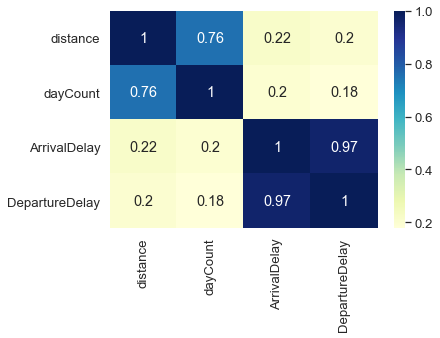

In [26]:
sns.heatmap(train_tw.corr(), cmap="YlGnBu",  annot=True);

- There is positive correlations between distance and dayCount which is quite obivious.


- ArrivalDelay and DepartureDelay are strongly correlated with each other.


- No correlation between the features and predictors.

<hr>

#### RunDate w.r.t ArrivalDelay and Departure Delay

In [27]:
train_tw.groupby("runDate").apply(lambda x: x[['ArrivalDelay', "DepartureDelay"]].describe(percentiles = [.25, .50, .75, .85, .90, .98]).T)

count       mean         std   min    25%   50%  \
runDate                                                                      
2020-01-01 ArrivalDelay    648.0  42.901235   58.596935 -20.0   7.00  23.0   
           DepartureDelay  648.0  43.024691   57.608410   0.0   6.75  23.0   
2020-01-02 ArrivalDelay    695.0  46.061871   74.851711 -89.0   3.00  15.0   
           DepartureDelay  695.0  44.251799   60.944286   0.0   4.00  15.0   
2020-01-03 ArrivalDelay    539.0  63.053803   67.530379 -21.0  12.00  37.0   
           DepartureDelay  539.0  62.471243   65.896200   0.0  11.00  36.0   
2020-01-04 ArrivalDelay    648.0  71.179012   92.123424 -23.0  12.00  39.0   
           DepartureDelay  648.0  70.927469   91.610708   0.0  11.00  38.0   
2020-01-05 ArrivalDelay    695.0  50.349640   86.246714 -27.0   5.00  18.0   
           DepartureDelay  695.0  51.266187   84.969581   0.0   7.00  19.0   
2020-01-06 ArrivalDelay    695.0  31.890647   38.144267 -23.0   8.00  20.0   
           DepartureDelay  695.0  32.700719   37.811335   0.0   8.00  20.0   
2020-01-07 ArrivalDelay    607.0  30.799012   49.730022 -23.0   6.00  17.0   
           DepartureDelay  607.0  31.897858   49.108751   0.0   7.00  18.0   
2020-01-08 ArrivalDelay    601.0  28.407654   35.363567 -29.0   6.00  16.0   
           DepartureDelay  601.0  29.217970   34.681898   0.0   6.00  16.0   
2020-01-09 ArrivalDelay    522.0  47.427203   63.915217 -20.0   7.00  21.0   
           DepartureDelay  522.0  48.208812   63.189509   0.0   8.00  20.5   
2020-01-10 ArrivalDelay    651.0  85.886329  147.254022 -23.0   7.00  26.0   
           DepartureDelay  651.0  85.950845  145.443293   0.0   8.00  27.0   
2020-01-11 ArrivalDelay    659.0  41.790592   58.632479 -19.0   7.00  23.0   
           DepartureDelay  659.0  42.210926   57.714048   0.0   7.00  23.0   
2020-01-12 ArrivalDelay    603.0  52.862355   69.484619 -22.0   6.00  18.0   
           DepartureDelay  603.0  53.495854   69.146803   0.0   6.00  18.0   
2020-01-13 ArrivalDelay    695.0  54.860432   83.961167 -22.0   6.00  23.0   
           DepartureDelay  695.0  55.496403   82.678693   0.0   7.00  23.0   
2020-01-14 ArrivalDelay    695.0  37.038849   52.808500 -21.0   3.00  17.0   
           DepartureDelay  695.0  38.179856   52.373334   0.0   4.00  18.0   
2020-01-15 ArrivalDelay    631.0  35.927100   58.956274 -26.0   3.00  15.0   
           DepartureDelay  631.0  37.090333   58.155154   0.0   4.00  15.0   
2020-01-16 ArrivalDelay    651.0  39.185868   55.500915 -22.0   3.00  16.0   
           DepartureDelay  651.0  39.817204   52.901698   0.0   3.00  17.0   
2020-01-17 ArrivalDelay    695.0  69.738129   86.083251 -37.0   7.00  36.0   
           DepartureDelay  695.0  69.502158   85.104511   0.0   7.50  32.0   
2020-01-18 ArrivalDelay    647.0  44.463679   60.437811 -43.0   5.50  20.0   
           DepartureDelay  647.0  44.993818   59.081593   0.0   6.00  21.0   
2020-01-19 ArrivalDelay    557.0  42.736086   60.582161 -23.0   5.00  18.0   
           DepartureDelay  557.0  43.357271   59.215129   0.0   6.00  19.0   
2020-01-20 ArrivalDelay    632.0  56.145570   75.957101 -27.0   7.00  24.0   
           DepartureDelay  632.0  56.449367   74.855194   0.0   7.00  24.0   
2020-01-21 ArrivalDelay    647.0  48.956723   69.635459 -25.0   7.00  25.0   
           DepartureDelay  647.0  49.302937   68.763117   0.0   7.00  26.0   
2020-01-22 ArrivalDelay    648.0  44.598765   60.064130 -28.0   5.00  18.0   
           DepartureDelay  648.0  45.012346   59.107948   0.0   5.00  18.0   
2020-01-23 ArrivalDelay    632.0  51.435127   85.326755 -29.0   4.00  17.0   
           DepartureDelay  632.0  52.655063   84.245122   0.0   4.00  18.0   
2020-01-24 ArrivalDelay    659.0  40.711684   48.861712 -24.0   7.00  23.0   
           DepartureDelay  659.0  41.280728   48.364074   0.0   7.00  22.0   
2020-01-25 ArrivalDelay    588.0  30.413265   39.533708 -39.0   3.00  16.0   
           DepartureDelay  588.0  31.850340   38.

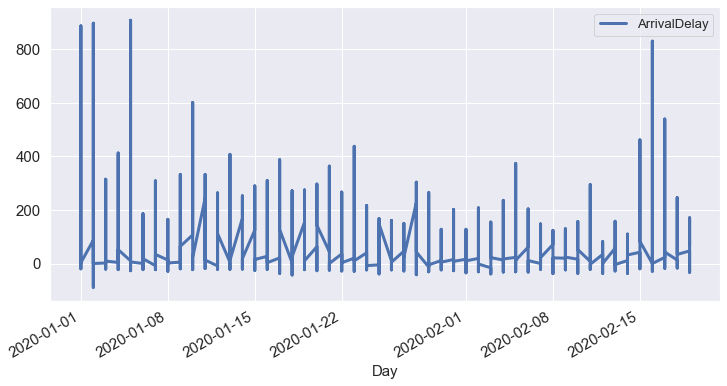

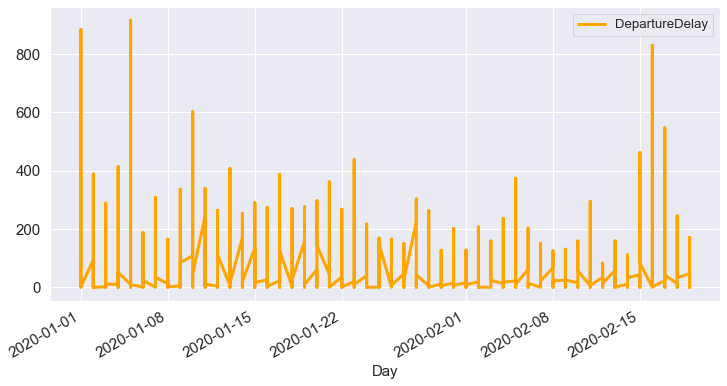

In [28]:
dummy = train_tw[['runDate', 'ArrivalDelay']]
dummy.set_index('runDate', inplace=True)

dummy.plot(figsize=(12,6), linewidth=3, fontsize=15)
plt.xlabel('Day', fontsize=15);

dummy = train_tw[['runDate', 'DepartureDelay']]
dummy.set_index('runDate', inplace=True)

dummy.plot(figsize=(12, 6), linewidth=3, fontsize=15, color='orange')
plt.xlabel('Day', fontsize=15);

#### ArrivalDelay and DepartureDelay ditribution w.r.t trainCode

In [29]:
train_tw.groupby("trainCode").apply(lambda x: x[['ArrivalDelay', "DepartureDelay"]].describe(percentiles = [.25, .50, .75, .85, .90, .98]).T)

count       mean         std   min   25%   50%  \
trainCode                                                                   
12138     ArrivalDelay    2646.0  51.352230   68.286840 -27.0   8.0  19.0   
          DepartureDelay  2646.0  51.619803   67.430955   0.0   9.0  19.0   
12139     ArrivalDelay    2070.0  15.738164   20.287709 -18.0   3.0  11.0   
          DepartureDelay  2070.0  16.086957   20.051147   0.0   2.0  11.0   
12295     ArrivalDelay    1656.0  33.690821   89.198383 -89.0   2.0  14.0   
          DepartureDelay  1656.0  36.661836   86.647993   0.0   4.0  15.0   
12311     ArrivalDelay    1911.0  84.858713   96.552473 -39.0   7.0  47.0   
          DepartureDelay  1911.0  84.591837   95.776090   0.0   6.0  44.0   
12321     ArrivalDelay    2256.0  41.808067   67.025930 -31.0   4.0  17.0   
          DepartureDelay  2256.0  43.147606   66.359031   0.0   4.0  18.0   
12616     ArrivalDelay    1833.0  66.882706  100.405504 -38.0   9.0  29.0   
          DepartureDelay  1833.0  66.711402   99.299293   0.0  10.0  29.0   
12617     ArrivalDelay    2256.0  38.460550   51.778423 -37.0  13.0  27.0   
          DepartureDelay  2256.0  39.583333   46.868379   0.0  15.0  29.0   
12625     ArrivalDelay    2150.0  19.417209   35.819676 -27.0   2.0  11.0   
          DepartureDelay  2150.0  20.950233   32.024956   0.0   4.0  13.0   
12656     ArrivalDelay    2200.0   9.710909   15.723858 -23.0   0.0   7.0   
          DepartureDelay  2200.0  12.385000   13.933071   0.0   2.0   8.0   
12722     ArrivalDelay    2021.0  64.956457   81.966958 -42.0  10.0  40.0   
          DepartureDelay  2021.0  65.144978   80.355727   0.0  10.0  40.0   
12809     ArrivalDelay    1936.0  18.479855   29.407405 -25.0   5.0  12.0   
          DepartureDelay  1936.0  18.859504   27.705761   0.0   5.0  12.0   
12833     ArrivalDelay    2520.0  32.282937   47.356441 -20.0   5.0  17.0   
          DepartureDelay  2520.0  32.782540   46.146163   0.0   7.0  17.0   
12834     ArrivalDelay    2880.0  53.722222   46.502674 -26.0  16.0  48.0   
          DepartureDelay  2880.0  54.523264   46.087404   0.0  17.0  48.0   
12840     ArrivalDelay    1692.0  17.763002   25.041963 -22.0   2.0  13.0   
          DepartureDelay  1692.0  18.454492   23.818472   0.0   2.0  13.0   
12925     ArrivalDelay    1848.0  22.751082   37.534546 -32.0   2.0  10.0   
          DepartureDelay  1848.0  24.071970   36.797117   0.0   2.0  11.0   

                            75%     85%    90%     98%    max  
trainCode                                                      
12138     ArrivalDelay     70.0  127.00  152.0  239.00  388.0  
          DepartureDelay   68.0  126.25  151.0  240.20  387.0  
12139     ArrivalDelay     23.0   31.00   36.1   68.00  300.0  
          DepartureDelay   23.0   31.00   37.0   68.62  301.0  
12295     ArrivalDelay     32.0   52.00   69.0  322.30  831.0  
          DepartureDelay   34.0   54.75   71.0  299.50  830.0  
12311     ArrivalDelay    143.0  197.00  232.0  330.00  438.0  
          DepartureDelay  139.5  195.00  231.0  329.80  438.0  
12321     ArrivalDelay     48.0   87.00  123.5  282.90  453.0  
          DepartureDelay   50.0   86.75  125.0  288.00  454.0  
12616     ArrivalDelay     78.0  132.00  206.8  397.36  602.0  
          DepartureDelay   74.0  131.00  205.8  397.00  603.0  
12617     ArrivalDelay     50.0   66.00   84.0  160.00  909.0  
          DepartureDelay   50.0   66.00   83.5  160.90  916.0  
12625     ArrivalDelay     25.0   35.65   43.0  143.00  362.0  
          DepartureDelay   26.0   36.65   43.0  122.00  368.0  
12656     ArrivalDelay     18.0   25.00   30.1   49.00  116.0  
          DepartureDelay   19.0   26.00   31.0   50.00  116.0  
12722     ArrivalDelay     90.0  123.00  154.0  294.20  610.0  
          DepartureDelay   90.0  124.00  153.0  286.60  546.0  
12809     ArrivalDelay     23.0   32.00   39.5  102.30  280.0  
          DepartureDelay   23.0   31.00   38.0   95.60  279.0  
12833     ArrivalDelay    

#### ArrivalDelay and DepartureDelay ditribution w.r.t stations

In [36]:
train_tw.groupby("stations").apply(lambda x: x[['ArrivalDelay', "DepartureDelay"]].describe(percentiles = [.25, .50, .75, .85, .90, .98]).T)

count        mean        std   min   25%   50%  \
stations                                                                  
ADH      ArrivalDelay     42.0    8.285714  23.733568   0.0   3.0   3.0   
         DepartureDelay   42.0    7.571429  23.458467   0.0   2.0   3.0   
ADI      ArrivalDelay    135.0    4.629630  20.100769 -11.0  -4.0   0.0   
         DepartureDelay  135.0    1.177778   3.865011   0.0   0.0   0.0   
AGC      ArrivalDelay    236.0   38.716102  55.735163 -13.0   8.0  16.0   
...                        ...         ...        ...   ...   ...   ...   
WR       DepartureDelay  224.0   28.562500  41.826093   0.0   1.0  13.0   
WRR      ArrivalDelay    138.0   34.920290  64.197467 -15.0   4.0  14.0   
         DepartureDelay  138.0   35.420290  63.655071   0.0   4.0  14.0   
ZN       ArrivalDelay     43.0  105.186047  91.373711  14.0  52.0  76.0   
         DepartureDelay   43.0  104.325581  91.450929  13.0  51.5  76.0   

                            75%     85%    90%     98%    max  
stations                                                       
ADH      ArrivalDelay      5.00    6.85    7.9   46.12  156.0  
         DepartureDelay    4.00    5.00    6.0   44.12  154.0  
ADI      ArrivalDelay      1.00    6.80   15.0   78.24  111.0  
         DepartureDelay    1.00    2.00    3.0   10.32   37.0  
AGC      ArrivalDelay     36.25   83.75  112.0  226.20  264.0  
...                         ...     ...    ...     ...    ...  
WR       DepartureDelay   31.50   60.65   81.7  157.70  238.0  
WRR      ArrivalDelay     35.00   82.90  103.2  186.24  519.0  
         DepartureDelay   34.00   82.90  102.5  186.24  519.0  
ZN       ArrivalDelay    134.50  175.60  186.4  344.48  536.0  
         DepartureDelay  133.50  175.30  185.4  344.32  535.0  

[698 rows x 11 columns]